#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [2]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Task 1:
**Basic Data Exploration:** Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [4]:
num_rows = df.shape[0]
num_columns = df.shape[1]

print("\nNumber of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 148654
Number of columns: 13


In [5]:
data_types = df.dtypes

print("\nData types of each column:")
print(data_types)



Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [6]:
missing_values = df.isnull().sum()

print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# Task 2:
**Descriptive Statistics:** Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [11]:
# Basic statistics
total_pay_benefits_stats = df['TotalPayBenefits'].describe()
mode_total_pay_benefits = df['TotalPayBenefits'].mode()

print("\nBasic statistics for TotalPayBenefits:")
print(total_pay_benefits_stats)
print("\nMode of TotalPayBenefits:")
print(mode_total_pay_benefits)


Basic statistics for TotalPayBenefits:
count    148654.000000
mean      93692.554811
std       62793.533483
min        -618.130000
25%       44065.650000
50%       92404.090000
75%      132876.450000
max      567595.430000
Name: TotalPayBenefits, dtype: float64

Mode of TotalPayBenefits:
0    7959.18
Name: TotalPayBenefits, dtype: float64


In [12]:
# The range
range_total_pay_benefits = df['TotalPayBenefits'].max() - df['TotalPayBenefits'].min()

print("\nRange of TotalPayBenefits:")
print(range_total_pay_benefits)


Range of TotalPayBenefits:
568213.56


In [13]:
# Standard deviation
std_total_pay_benefits = df['TotalPayBenefits'].std()

print("\nStandard deviation of TotalPayBenefits:")
print(std_total_pay_benefits)


Standard deviation of TotalPayBenefits:
62793.533483237705


# Task 3:
**Data Cleaning:**Handle missing data by suitable method with explain why you use it.

In [14]:
#  Replace missing values in 'BasePay' column with the average value --> sence every one must have a BasePay the avg seems logical and also value zero exist so it's not logical to assume that there are supposed to be zeros
avg_base_pay = df['BasePay'].mean()
df['BasePay'].fillna(avg_base_pay, inplace=True)

# Handle missing data in 'OvertimePay', 'OtherPay', and 'Benefits' columns by inserting zeros --> since not every one are having over time or benefits and since the total sum treat the missings as zeros
df['OvertimePay'].fillna(0, inplace=True)
df['OtherPay'].fillna(0, inplace=True)
df['Benefits'].fillna(0, inplace=True)

# Convert 'OvertimePay', 'OtherPay', and 'Benefits' columns to float64 type  --> since the entire columns are empty
df['OvertimePay'] = df['OvertimePay'].astype('float64')
df['OtherPay'] = df['OtherPay'].astype('float64')

# Drop columns 'Notes' and 'Status' if they exist
columns_to_drop = ['Notes', 'Status']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [15]:
print(df)

            Id       EmployeeName  \
0            1     NATHANIEL FORD   
1            2       GARY JIMENEZ   
2            3     ALBERT PARDINI   
3            4  CHRISTOPHER CHONG   
4            5    PATRICK GARDNER   
...        ...                ...   
148649  148650      Roy I Tillery   
148650  148651       Not provided   
148651  148652       Not provided   
148652  148653       Not provided   
148653  148654          Joe Lopez   

                                              JobTitle       BasePay  \
0       GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18000   
1                      CAPTAIN III (POLICE DEPARTMENT)  155966.02000   
2                      CAPTAIN III (POLICE DEPARTMENT)  212739.13000   
3                 WIRE ROPE CABLE MAINTENANCE MECHANIC   77916.00000   
4         DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134401.60000   
...                                                ...           ...   
148649                                       Custod

# Task 4:
**Basic Data Visualization:** Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

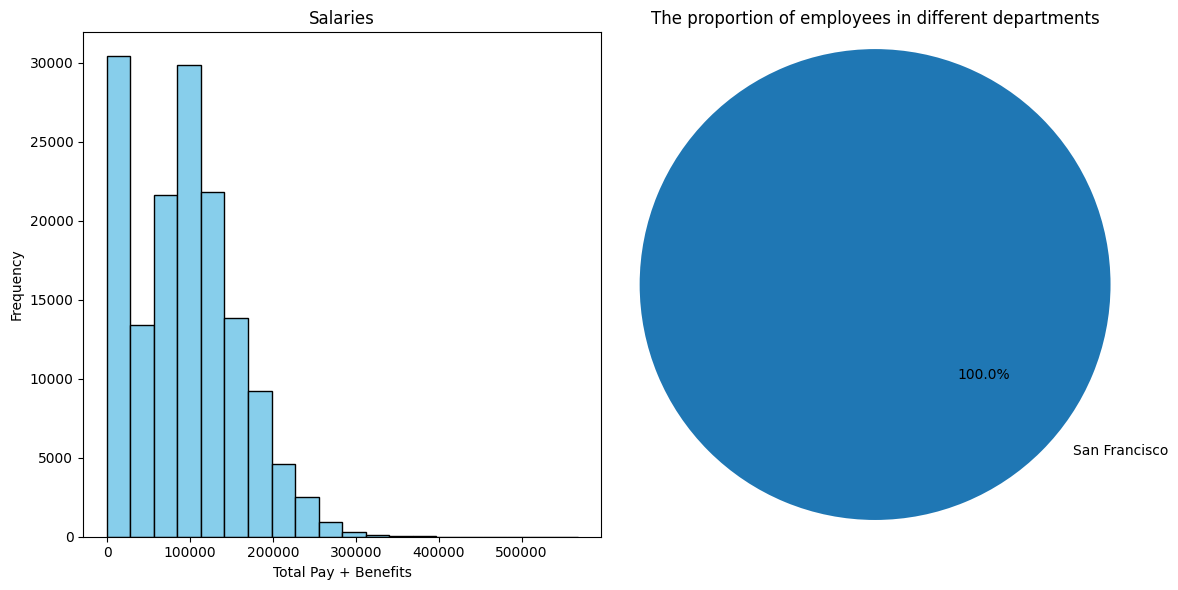

In [16]:
import matplotlib.pyplot as plt

# Figure and axes for histograms/bar charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogram for TotalPayBenefits column
axes[0].hist(df['TotalPayBenefits'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Salaries')
axes[0].set_xlabel('Total Pay + Benefits')
axes[0].set_ylabel('Frequency')

# Pie chart for Agency column
agency_counts = df['Agency'].value_counts()
axes[1].pie(agency_counts, labels=agency_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('The proportion of employees in different departments')

# Equal aspect ratio ensures that pie is drawn as a circle
axes[1].axis('equal')

# Display the plots
plt.tight_layout()
plt.show()


# Task 5:
**Grouped Analysis:** Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [17]:
# Group the data by "JobTitle" column and calculate summary statistics for each group
job_title_stats = df.groupby('JobTitle')['TotalPayBenefits'].describe()

# Display summary statistics for each group
print(job_title_stats)

# Compare the average salaries across different groups
average_salary_by_job_title = df.groupby('JobTitle')['TotalPayBenefits'].mean()
print("\nAverage salaries across different job titles:")
print(average_salary_by_job_title)


                                                count          mean  \
JobTitle                                                              
ACCOUNT CLERK                                    83.0  44035.664337   
ACCOUNTANT                                        5.0  47429.268000   
ACCOUNTANT INTERN                                48.0  29031.742917   
ACPO,JuvP, Juv Prob (SFERS)                       1.0  80266.370000   
ACUPUNCTURIST                                     1.0  67594.400000   
...                                               ...           ...   
X-RAY LABORATORY AIDE                            26.0  52705.880385   
X-Ray Laboratory Aide                           100.0  69521.123200   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    1.0  53632.870000   
Youth Comm Advisor                                4.0  60118.550000   
ZOO CURATOR                                       1.0  66686.560000   

                                                         std       min  \
Jo

In [23]:
# Sort average salaries in ascending order
average_salary_by_job_title_sorted = average_salary_by_job_title.sort_values()

print("\nAverage salaries across different job titles (sorted):")
print(average_salary_by_job_title_sorted)


Average salaries across different job titles (sorted):
JobTitle
Not provided                                           0.000000
PUBLIC SAFETY COMMUNICATIONS TECHNICIAN              149.510000
BOARD/COMMISSION MEMBER, GROUP II                    296.511628
BdComm Mbr, Grp2,M=$25/Mtg                           475.047742
BOARD/COMMISSION MEMBER, GROUP III                   638.787879
                                                      ...      
Gen Mgr, Public Trnsp Dept                        380696.440000
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Chief, Fire Department                            408865.326667
Chief of Police                                   411732.266667
Chief Investment Officer                          436224.360000
Name: TotalPayBenefits, Length: 2159, dtype: float64


# Task 6:
**Simple Correlation Analysis:** Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

Correlation between TotalPayBenefits and Year: 0.15194732496121088


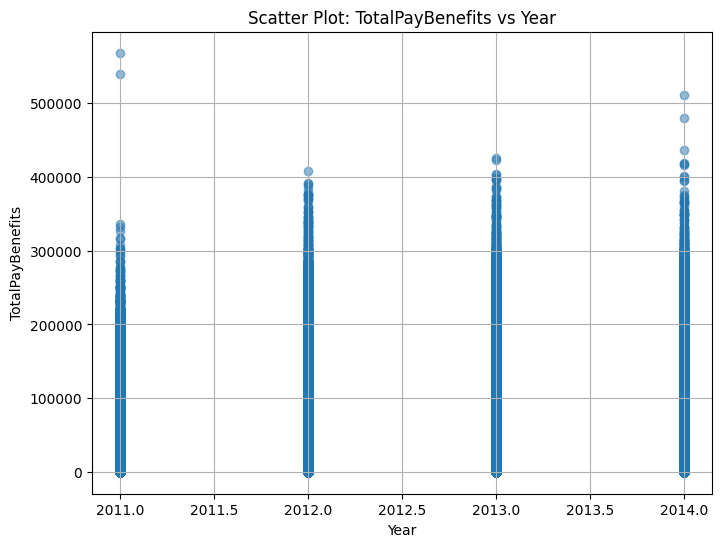

In [18]:
# Calculate the correlation between 'TotalPayBenefits' and 'Year' columns
correlation = df['TotalPayBenefits'].corr(df['Year'])

# Print the correlation coefficient
print("Correlation between TotalPayBenefits and Year:", correlation)

# Plot a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(df['Year'], df['TotalPayBenefits'], alpha=0.5)
plt.title('Scatter Plot: TotalPayBenefits vs Year')
plt.xlabel('Year')
plt.ylabel('TotalPayBenefits')
plt.grid(True)
plt.show()


# Task 7:
**Summary of Insights:** Write a brief report summarizing the findings and insights from the analyses.

**Data Overview:**

The dataset comprised several columns including "JobTitle", "TotalPayBenefits", "Year", "BasePay", "OvertimePay", "OtherPay", "Benefits", among others.

**Descriptive Statistics:**

1. The dataset contained a total of 148654 rows and 13 columns.
2. Initial exploration revealed missing values in columns such as "BasePay", "OvertimePay", "OtherPay", and "Benefits". Missing values in the "BasePay" column were replaced by the average value of that column, while missing values in the other columns were replaced with zeros.
3. Columns "Notes" and "Status" were removed from the dataset.

**Salary Distribution:**
1. The histogram visualization of the "TotalPayBenefits" column showed that most of the salaries were around 2 peaks, one around 100,000 $ and thisbelong to anormal skewd distribution and the other was one peak representing the howest salaries.
2. The pie chart representation of the "Agency" column depicted the proportion of employees in different departments. Department San francisco had the all the proportion of employees, meaning that the campant have one place and that in San Francisco.

**Correlation Analysis:**

The correlation coefficient between the "TotalPayBenefits" and "Year" columns was calculated to be 0.15194, indicating a positive correlation. Yey it is a small value as shown in the scatter plot, meaning that the salaries increases indeed over the years but in very slow rate.

**Job Title Analysis:**

Summary statistics were calculated for each unique job title in the dataset. The average salaries across different job titles varied significantly, with the PUBLIC SAFETY COMMUNICATIONS TECHNICIAN as the lowest avg of about 149.510000 and with the Chief Investment Officer as the largest avg of about 436224.360000 $.

**Conclusion:**

The analysis provided valuable insights into employee salary data, highlighting key trends, distributions, and correlations within the dataset. Further investigation into specific job titles and departments could provide additional insights for decision-making processes regarding employee compensation and resource allocation.